In [56]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
import graphviz

In [3]:
iris = load_iris()
x = iris.data[: , 2:]
y = iris.target

In [8]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


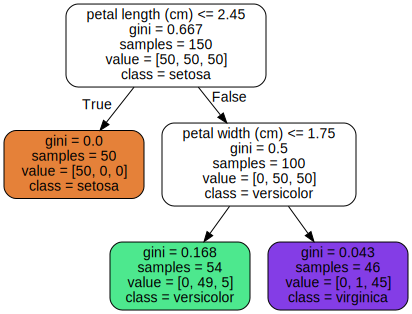

In [9]:
data = export_graphviz(
    tree_clf,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded = True,
    filled = True
)

graph = graphviz.Source(data)
graph

In [27]:
y_pred = tree_clf.predict(x)
decision_boundary = tree_clf.decision_path(x)

decision_boundary.shape

(150, 5)

In [34]:
def plot_points(x , y):
    plt.scatter(x[: , 0] , x[: , 1] , c=y)
    

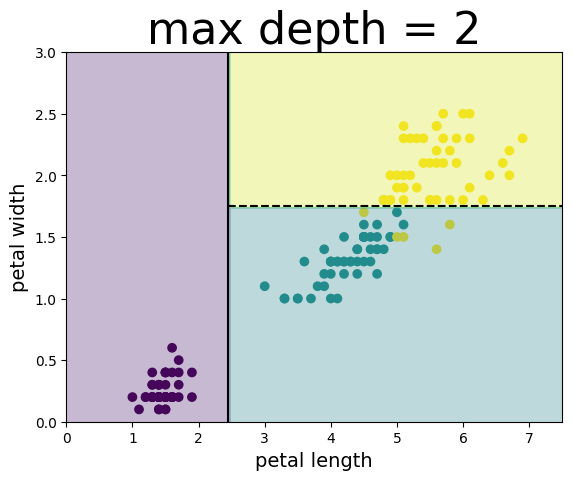

In [55]:
def plot_decision(model , axes):
    x1 = np.linspace(axes[0] , axes[1] , 100)
    x2 = np.linspace(axes[2] , axes[3] , 100)
    x1_meshgrid , x2_meshgrid = np.meshgrid(x1 , x2)
    x_final_points = np.c_[x1_meshgrid.ravel() , x2_meshgrid.ravel()]
    y_pred = tree_clf.predict(x_final_points).reshape(x1_meshgrid.shape)
    plt.contourf(x1_meshgrid , x2_meshgrid , y_pred ,alpha = 0.3)
    plt.axis(axes)
    plt.xlabel("petal length" , fontsize = 14)
    plt.ylabel("petal width" , fontsize=14)
    plt.show()
    

plt.plot([2.45 , 2.45] , [0,3], "k-")
plt.plot([2.45 , 7.5] , [1.75 , 1.75] , "k--")
plt.title("max depth = 2" , fontsize = 32)
plot_points(x , y)
plot_decision(tree_clf , [0, 7.5, 0, 3])



In [61]:
max_depth_ = 3
another_tree_clf = Pipeline([
    ("tree" , DecisionTreeClassifier(max_depth=max_depth_))
])

another_tree_clf.fit(x , y)

,steps,"[('tree', ...)]"
,transform_input,None
,memory,None
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None


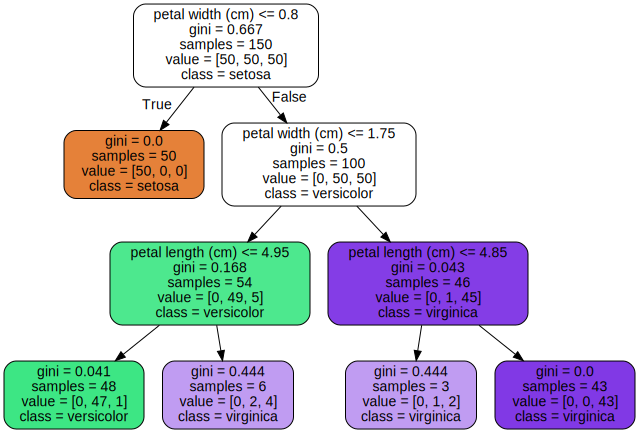

In [63]:
tree_image = export_graphviz(
    another_tree_clf[0],
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled = True
)

graph = graphviz.Source(tree_image)
graph

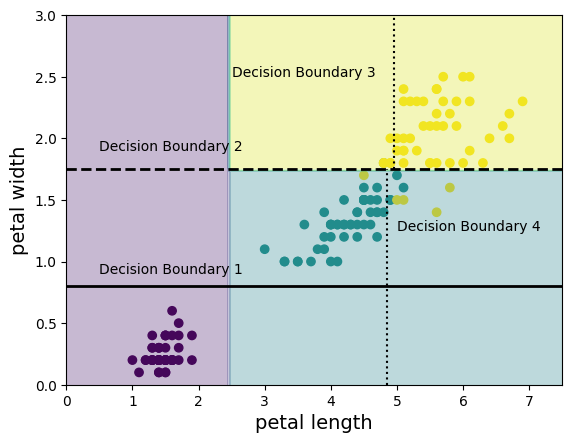

In [90]:
plot_points(x , y)
plt.plot([0 , 7.5] , [0.8 , 0.8] ,"k-", linewidth= 2 )
plt.plot([0 , 7.5] , [1.75 , 1.75] , "k--" , linewidth=2)
plt.plot([4.95 , 4.95] , [1.75 , 3] , "k:")
plt.plot([4.85 , 4.85] , [0 , 1.75] , "k:")
plt.text(0.5 , 0.90 , "Decision Boundary 1" )
plt.text(0.5 , 1.90 , "Decision Boundary 2")
plt.text(2.5 , 2.5 , "Decision Boundary 3")
plt.text(5 , 1.25 , "Decision Boundary 4")
plt.plot()
plot_decision(another_tree_clf , [0, 7.5, 0, 3])
